# Stack Overflow

## Introduction 

In this project, I will use some posts on Stack Overflow during the year of 2015 and measure the similarity of users by looking at their answers' score.

## Step 1. Getting the data

I made a sample request to the Stack Overflow API to get 1 days worth of data from 2015. Documentation of the Stack Exchange API can be found [here](https://api.stackexchange.com/docs).

In [1]:
import requests
from datetime import datetime

start_time = 1420070400 # 01-01-2015 at 00:00:00
end_time   = 1420156800 # 01-02-2015 at 00:00:00

response = requests.get("https://api.stackexchange.com/2.2/questions?pagesize=100" +
                        "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
                        "&order=asc&sort=creation&site=stackoverflow")
print(response)
type(response)

<Response [200]>


requests.models.Response

Now, object *response* contains the raw text of posts from the first day of 2015. 
Note that all dates in the Stack Exchange API are in [unix epoch time](https://en.wikipedia.org/wiki/Unix_time). The format for the request string is specified [here](https://api.stackexchange.com/docs/questions).

It is not possible to read the raw response. Instead, we need to decode the raw response as **JSON** and use the `json` library to print it.

In [3]:
import json

json_response = response.json()

print(json.dumps(json_response, indent=1))

{
 "items": [
  {
   "tags": [
    "php",
    "mysql",
    "arrays",
    "mysqli"
   ],
   "owner": {
    "reputation": 220,
    "user_id": 3210431,
    "user_type": "registered",
    "accept_rate": 78,
    "profile_image": "https://i.stack.imgur.com/QTjBV.jpg?s=128&g=1",
    "display_name": "salep",
    "link": "https://stackoverflow.com/users/3210431/salep"
   },
   "is_answered": true,
   "view_count": 246,
   "accepted_answer_id": 27727478,
   "answer_count": 2,
   "score": 0,
   "last_activity_date": 1420071815,
   "creation_date": 1420070458,
   "question_id": 27727385,
   "link": "https://stackoverflow.com/questions/27727385/inserting-multiple-records-into-mysql-from-an-array",
   "title": "Inserting multiple records into MySQL from an array"
  },
  {
   "tags": [
    "apache-pig"
   ],
   "owner": {
    "reputation": 6,
    "user_id": 868779,
    "user_type": "registered",
    "profile_image": "https://www.gravatar.com/avatar/19f7315b44e97ca1bc069694fdba7428?s=128&d=identicon&r

Now we can easily see that the response consists of a list of question items. For each of these items, we get information about its attributes such as its `creation_date`, `answer_count`, `owner`, `title`, etc.

Notice that has_more is true. To get more items, we can [request the next page](https://api.stackexchange.com/docs/paging).

-----------------

## Step 2. Parsing the responses

Now we parse the responses to get (creation_date, is_question_answered) and print them

In [110]:
import requests
import json
def print_creation_dates_is_answered_json(response):
    """
    Prints the creation_date of all the questions in the response.
    
    Parameters:
        response: Response object
    """    
    jsonResp = response.json()
    
    for i in jsonResp['items']:
        toPrint = '('+str(i['creation_date'])+','+str(i['is_answered'])+')'
        print(toPrint)


In [ ]:
import requests
from datetime import datetime
import json
import time
start_time = 1420070400 # 01-01-2015 at 00:00:00
end_time   = 1420156800 # 01-02-2015 at 00:00:00
n=1
while True:
    
    response = requests.get("https://api.stackexchange.com/2.2/questions?page="+str(n)+"&pagesize=100" +
                        "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
                        "&order=asc&sort=creation&site=stackoverflow")
    n = n+1
    print_creation_dates_is_answered_json(response)
    
    if response.json()['has_more']=='false' :
        break
    time.sleep(3)


(1420070458,True)
(1420070503,False)
(1420070552,True)
(1420070577,True)
(1420070611,True)
(1420070641,False)
(1420070703,False)
(1420070727,True)
(1420070734,True)
(1420070777,False)
(1420070801,True)
(1420070848,True)
(1420070859,True)
(1420070866,False)
(1420070968,True)
(1420071005,False)
(1420071029,True)
(1420071103,True)
(1420071122,True)
(1420071175,True)
(1420071184,False)
(1420071212,False)
(1420071230,False)
(1420071340,True)
(1420071431,True)
(1420071530,True)
(1420071736,False)
(1420071794,True)
(1420071830,True)
(1420071868,False)
(1420071907,True)
(1420071929,True)
(1420071939,True)
(1420072002,False)
(1420072021,False)
(1420072074,True)
(1420072129,False)
(1420072243,True)
(1420072342,True)
(1420072354,True)
(1420072397,False)
(1420072430,True)
(1420072455,False)
(1420072481,True)
(1420072610,True)
(1420072638,True)
(1420072667,True)
(1420072685,True)
(1420072777,False)
(1420072779,True)
(1420072902,True)
(1420072924,True)
(1420072976,False)
(1420072979,True)
(142007299

(1420097102,True)
(1420097259,True)
(1420097292,True)
(1420097378,False)
(1420097390,True)
(1420097523,False)
(1420097531,True)
(1420097614,True)
(1420097648,True)
(1420097655,True)
(1420097661,True)
(1420097736,True)
(1420097803,False)
(1420097806,True)
(1420097938,False)
(1420097975,False)
(1420097991,False)
(1420098036,True)
(1420098049,True)
(1420098070,True)
(1420098097,True)
(1420098170,True)
(1420098183,True)
(1420098264,True)
(1420098322,True)
(1420098332,False)
(1420098337,True)
(1420098377,True)
(1420098400,True)
(1420098434,True)
(1420098465,True)
(1420098482,True)
(1420098502,True)
(1420098602,True)
(1420098616,True)
(1420098678,False)
(1420098697,True)
(1420098727,False)
(1420098829,True)
(1420098878,True)
(1420098887,True)
(1420098996,True)
(1420099104,True)
(1420099189,True)
(1420099205,False)
(1420099257,True)
(1420099270,True)
(1420099306,True)
(1420099313,True)
(1420099393,True)
(1420099422,False)
(1420099478,True)
(1420099505,True)
(1420099562,True)
(1420099616,True)

(1420114211,True)
(1420114263,True)
(1420114271,False)
(1420114276,True)
(1420114296,False)
(1420114312,True)
(1420114315,False)
(1420114351,True)
(1420114363,True)
(1420114376,True)
(1420114386,False)
(1420114425,False)
(1420114452,False)
(1420114452,True)
(1420114473,True)
(1420114479,True)
(1420114480,False)
(1420114511,True)
(1420114516,True)
(1420114533,False)
(1420114557,False)
(1420114567,False)
(1420114572,False)
(1420114610,True)
(1420114612,True)
(1420114619,False)
(1420114631,True)
(1420114713,True)
(1420114733,False)
(1420114734,True)
(1420114752,False)
(1420114756,True)
(1420114907,False)
(1420114919,True)
(1420114943,True)
(1420114956,True)
(1420114969,True)
(1420114980,True)
(1420115005,True)
(1420115092,True)
(1420115113,True)
(1420115201,True)
(1420115317,True)
(1420115329,True)
(1420115423,True)
(1420115438,True)
(1420115464,False)
(1420115476,True)
(1420115492,True)
(1420115500,True)
(1420115531,True)
(1420115533,True)
(1420115539,True)
(1420115550,False)
(1420115555

(1420127509,True)
(1420127540,False)
(1420127578,False)
(1420127585,True)
(1420127586,False)
(1420127599,True)
(1420127644,False)
(1420127663,True)
(1420127740,True)
(1420127814,False)
(1420127858,True)
(1420127859,True)
(1420127861,True)
(1420127900,False)
(1420127914,True)
(1420127915,True)
(1420127925,True)
(1420127940,False)
(1420127956,False)
(1420127970,True)
(1420127984,True)
(1420127989,True)
(1420128018,True)
(1420128042,True)
(1420128046,True)
(1420128107,True)
(1420128167,True)
(1420128178,True)
(1420128181,True)
(1420128192,True)
(1420128254,True)
(1420128271,False)
(1420128296,True)
(1420128299,True)
(1420128300,True)
(1420128317,True)
(1420128380,True)
(1420128415,False)
(1420128418,False)
(1420128457,True)
(1420128475,True)
(1420128520,True)
(1420128643,False)
(1420128644,True)
(1420128711,True)
(1420128769,True)
(1420128770,True)
(1420128836,False)
(1420128841,True)
(1420128867,True)
(1420128879,False)
(1420128893,True)
(1420128924,False)
(1420128942,False)
(1420128967,

(1420140202,True)
(1420140250,True)
(1420140283,True)
(1420140302,True)
(1420140303,True)
(1420140305,True)
(1420140332,True)
(1420140371,True)
(1420140393,True)
(1420140452,True)
(1420140455,False)
(1420140472,True)
(1420140486,True)
(1420140497,True)
(1420140505,True)
(1420140509,True)
(1420140517,True)
(1420140517,True)
(1420140555,True)
(1420140567,False)
(1420140580,True)
(1420140591,True)
(1420140628,True)
(1420140645,True)
(1420140667,False)
(1420140672,False)
(1420140694,True)
(1420140707,True)
(1420140724,True)
(1420140740,False)
(1420140753,True)
(1420140756,True)
(1420140776,True)
(1420140791,True)
(1420140834,False)
(1420140847,True)
(1420140913,False)
(1420140958,True)
(1420140985,False)
(1420141011,False)
(1420141012,True)
(1420141027,True)
(1420141033,True)
(1420141097,True)
(1420141099,True)
(1420141145,True)
(1420141151,True)
(1420141152,True)
(1420141178,True)
(1420141186,True)
(1420141188,True)
(1420141199,True)
(1420141200,True)
(1420141257,True)
(1420141259,True)
(

(1420152780,True)
(1420152807,True)
(1420152845,True)
(1420152872,True)
(1420152882,True)
(1420152935,True)
(1420153016,True)
(1420153020,True)
(1420153089,True)
(1420153096,True)
(1420153170,False)
(1420153187,True)
(1420153203,True)
(1420153258,True)
(1420153264,True)
(1420153295,True)
(1420153337,False)
(1420153359,True)
(1420153403,True)
(1420153407,True)
(1420153423,True)
(1420153452,True)
(1420153453,True)
(1420153459,True)
(1420153496,False)
(1420153589,False)
(1420153615,True)
(1420153684,True)
(1420153701,True)
(1420153707,False)
(1420153727,True)
(1420153738,True)
(1420153773,True)
(1420153780,True)
(1420153812,True)
(1420153841,False)
(1420153867,True)
(1420153876,False)
(1420153884,True)
(1420153896,True)
(1420153902,False)
(1420153943,False)
(1420153983,True)
(1420153993,True)
(1420154019,False)
(1420154035,True)
(1420154057,False)
(1420154089,False)
(1420154175,False)
(1420154185,True)
(1420154185,False)
(1420154231,False)
(1420154240,False)
(1420154252,True)
(1420154280,

Here you can find the complete dataset parsed over many days: [data dump](https://drive.google.com/a/bu.edu/file/d/0BzeSDLWpnNHxaEd5XzhIZ2tJMlU/view?usp=sharing).
Keep in mind the XML is over 10GB.

I then read the XML into a pandas [Dataframe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) 

I used xml.etree.ElementTree to parse the XML Tree using iterparse.

In [1]:
# File imports
import xml.etree.ElementTree as ET
import csv
def Print_to_CSV(csvname, filename):
    
    columns = ['Id','CreationDate', 'OwnerUserID', 'Tags', 'ViewCount', 'Score', 'Type']
    # Id, CreationDate, OwnerUserId, the first tag in Tags, ViewCount, Score, Type
    #The first 5 tags are for questions
    #the first 3 tags and Score are for answers
    #Type = Q for question and A for answer
    DataWriter = open(csvname,'w')
    csvwrite  = csv.writer(DataWriter)
    csvwrite.writerow(columns)
    parser = ET.iterparse(filename, events =('start',))
    iterator = iter(parser)
    event, r = next(iterator)

    for event, element in iterator:
        rowToPrint = []
        if element.tag == 'row':

            
            if element.get('PostTypeId','')== '1': 
                Id=element.get('Id','')
                rowToPrint.append(Id+'')
                CD=element.get('CreationDate','')
                rowToPrint.append(CD)
                OUI = element.get('OwnerUserId','')
                rowToPrint.append(OUI)
                Tags = element.get('Tags','')
                TagStart = Tags.find('<')
                TagEnd = Tags.find('>')
                FirstTag= Tags[TagStart+1:TagEnd]
                rowToPrint.append(FirstTag)
                VC = element.get('ViewCount')
                rowToPrint.append(VC)
                rowToPrint.append(None)
                rowToPrint.append('Q')

            if element.get('PostTypeId','')== '2':
                Id=element.get('Id','')
                rowToPrint.append(Id+'')
                CD=element.get('CreationDate','')
                rowToPrint.append(CD)
                OUI = element.get('OwnerUserId','')
                rowToPrint.append(OUI)
                rowToPrint.append(None)
                rowToPrint.append(None)
                Score = element.get('Score')
                rowToPrint.append(Score)
                rowToPrint.append('A')

            csvwrite.writerow(rowToPrint)
        r.clear()
    DataWriter.close()



In [113]:
# Functions
from pandas import Series, DataFrame
import pandas as pd
import time

filename = 'stackoverflow-posts-2015.xml'
csvname = 'posts9.csv'
start_time = time.time()
print('start')
Print_to_CSV(csvname, filename)
print('end')
#df = pd.read_csv(csvname)
time_to_run = time.time()-start_time
#x= len(df)
#print('The Length of DF is: {}'.format(x))
print('Time of execution is : {}'.format(time_to_run))

start
end
Time of execution is : 419.0220956802368


In [114]:
import pandas as pd
from pandas import Series, DataFrame
csvname = 'posts8.csv'
df = pd.read_csv(csvname)

In [115]:
print(df)

               Id             CreationDate  OwnerUserID            Tags  \
0         2845211  2015-01-01T00:00:27.040    1971096.0             NaN   
1        27727116  2015-01-01T00:00:31.240    2410359.0             NaN   
2        27725620  2015-01-01T00:00:50.550    1366219.0             NaN   
3        27727385  2015-01-01T00:00:58.253    3210431.0             php   
4        11962138  2015-01-01T00:01:43.597    3886175.0             NaN   
5        27727388  2015-01-01T00:01:43.673     868779.0      apache-pig   
6        27725803  2015-01-01T00:02:02.050    3925941.0             NaN   
7        27726352  2015-01-01T00:02:30.233    1004312.0             NaN   
8        27727391  2015-01-01T00:02:32.123    4372672.0             ios   
9        27727393  2015-01-01T00:02:57.983    2482149.0      sql-server   
10       27727394  2015-01-01T00:03:31.337    4263870.0             php   
11       27727396  2015-01-01T00:04:01.407    4409381.0         android   
12       27727348  2015-0

-----------------

## Step 3. Putting it all together

I then computer the similarity between the top 100 users based on their highest answer scores. The users are compared based on the type of questions they answered (from the tags of the questions answered).

In [118]:
from sklearn.feature_extraction.text import CountVectorizer

adf = df[df['Type']=='A'] #split the dataframe into Question and answer dataframe
qdf = df[df['Type']=='Q']

adfs1 = adf.groupby('OwnerUserID')['Score'].sum().reset_index() #sort users by score 
adfs2 = adf.groupby('OwnerUserID')['Id'].apply(list).reset_index() #group users by ther ownerID and \
#get a list of all the parentIDs for the answers they have answered

top100=adfs1.sort_values('Score',ascending=False).head(100) #find top 100 users
top100_with_questionid = pd.merge(top100,adfs2,how='left') #join top 100 users with their lists of parentIDs

qdfa=qdf.set_index('Id')
myDict = {}
for index,row in top100_with_questionid.iterrows(): #Find the tags associated to each parentID
    tag_for_user = []
    try:
        for ids in row['Id']:
            try:
                tag_for_user.append(qdfa.loc[ids,'Tags'])
            except:
                continue
    except:
        continue
        
    myDict[row['OwnerUserID']]=tag_for_user 

b=[] 
for key in myDict:
    c=[]
    for i in myDict[key]:
        i.lower()
        c.append(i)
    d=' '.join(c)
    b.append(d) #coverting dict to list of string

cv = CountVectorizer()
cv_fit=cv.fit_transform(b)

I then Plot the distance of the top 100 users using a [heatmap](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html).

[[    0.          4937.43060711  2911.77162566 ...,  1058.30335916
    243.55492194   777.3229702 ]
 [ 4937.43060711     0.          5618.34272717 ...,  4217.57643677
   4910.08146572  4884.63427495]
 [ 2911.77162566  5618.34272717     0.         ...,  2898.47063121
   2858.45010451  2805.10481088]
 ..., 
 [ 1058.30335916  4217.57643677  2898.47063121 ...,     0.           900.44489004
    725.59837376]
 [  243.55492194  4910.08146572  2858.45010451 ...,   900.44489004     0.
    537.69508088]
 [  777.3229702   4884.63427495  2805.10481088 ...,   725.59837376
    537.69508088     0.        ]]


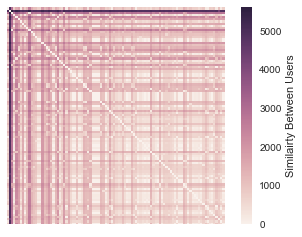

In [119]:
import sklearn.metrics as metrics
import random
import matplotlib.pyplot as plt
import seaborn as sns

ecl = metrics.euclidean_distances(cv_fit) #finding euclidian distance
print(ecl)


%matplotlib inline

_ = sns.heatmap(ecl, xticklabels=False, yticklabels=False, linewidths=0,
            square=True,cbar="YlGnBu", cbar_kws={'label': 'Similairty Between Users'} ) #plotting heatmap

This heatmap is symmetric because we take each user on both the axes and therefore the diagonal is also zero. It shows the weighted similarity between users. If a 2 users answering to similar tags and more number of answers for each tag would be more similar. 

-----------------